In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import numpy as np
from sklearn.svm import SVC
import pickle 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("dataset.csv")
df

,0.35867199301719666,0.8190932273864746,5.281586936689564e-07,0.4155340790748596,0.7879830598831177,-0.03356635943055153,0.4666382074356079,0.7277442812919617,-0.05586010962724686,0.5118821859359741,...,0.2750151455402374,0.5193837881088257,-0.08594155311584473,0.2552448511123657,0.46323639154434204,-0.09778134524822235,0.24060577154159546,0.4061579704284668,-0.10455761104822159,abrir
0,0.367801,0.829236,4.732217e-07,0.424064,0.812878,-0.034564,0.474579,0.761963,-0.055963,0.516686,...,0.300221,0.546980,-0.083158,0.283836,0.491546,-0.095299,0.271508,0.436664,-0.101871,abrir
1,0.378169,0.840884,4.626170e-07,0.434778,0.822853,-0.033195,0.483552,0.770545,-0.053648,0.524902,...,0.311662,0.555193,-0.081780,0.296001,0.499427,-0.093568,0.284812,0.444215,-0.099980,abrir
2,0.358156,0.816606,5.281317e-07,0.416254,0.787324,-0.033505,0.468927,0.727250,-0.055639,0.513819,...,0.278953,0.519979,-0.082317,0.259708,0.465111,-0.093577,0.244960,0.409683,-0.099592,abrir
3,0.366984,0.827797,4.269374e-07,0.422614,0.807616,-0.032468,0.470389,0.750047,-0.051260,0.511593,...,0.299714,0.537992,-0.074105,0.284550,0.482281,-0.086014,0.273699,0.427057,-0.092604,abrir
4,0.385573,0.845087,4.001955e-07,0.442687,0.827072,-0.030813,0.492803,0.775339,-0.049876,0.534581,...,0.328345,0.559368,-0.080052,0.313622,0.502456,-0.091830,0.303264,0.447777,-0.098318,abrir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cerrar
395,0.380495,0.644806,-3.341052e-07,0.428878,0.634654,-0.018863,0.479108,0.556479,-0.026710,0.488627,...,0.406090,0.443667,-0.056092,0.400388,0.505640,-0.050200,0.389185,0.492274,-0.041726,cerrar
396,0.385531,0.654720,-4.067371e-07,0.441095,0.644097,-0.019722,0.490565,0.572324,-0.029756,0.511303,...,0.411045,0.461502,-0.058773,0.405701,0.522240,-0.052138,0.393737,0.514538,-0.043123,cerrar
397,0.364563,0.676635,-3.624642e-07,0.413117,0.675213,-0.023397,0.468233,0.598219,-0.031574,0.497304,...,0.382021,0.478393,-0.051082,0.376922,0.539597,-0.044875,0.366938,0.530700,-0.035390,cerrar


In [34]:
df.columns = [x for x in range(df.shape[1])]
df = df.rename(columns={63:"resultado"})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,resultado
0,0.367801,0.829236,4.732217e-07,0.424064,0.812878,-0.034564,0.474579,0.761963,-0.055963,0.516686,...,0.300221,0.546980,-0.083158,0.283836,0.491546,-0.095299,0.271508,0.436664,-0.101871,abrir
1,0.378169,0.840884,4.626170e-07,0.434778,0.822853,-0.033195,0.483552,0.770545,-0.053648,0.524902,...,0.311662,0.555193,-0.081780,0.296001,0.499427,-0.093568,0.284812,0.444215,-0.099980,abrir
2,0.358156,0.816606,5.281317e-07,0.416254,0.787324,-0.033505,0.468927,0.727250,-0.055639,0.513819,...,0.278953,0.519979,-0.082317,0.259708,0.465111,-0.093577,0.244960,0.409683,-0.099592,abrir
3,0.366984,0.827797,4.269374e-07,0.422614,0.807616,-0.032468,0.470389,0.750047,-0.051260,0.511593,...,0.299714,0.537992,-0.074105,0.284550,0.482281,-0.086014,0.273699,0.427057,-0.092604,abrir
4,0.385573,0.845087,4.001955e-07,0.442687,0.827072,-0.030813,0.492803,0.775339,-0.049876,0.534581,...,0.328345,0.559368,-0.080052,0.313622,0.502456,-0.091830,0.303264,0.447777,-0.098318,abrir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cerrar
395,0.380495,0.644806,-3.341052e-07,0.428878,0.634654,-0.018863,0.479108,0.556479,-0.026710,0.488627,...,0.406090,0.443667,-0.056092,0.400388,0.505640,-0.050200,0.389185,0.492274,-0.041726,cerrar
396,0.385531,0.654720,-4.067371e-07,0.441095,0.644097,-0.019722,0.490565,0.572324,-0.029756,0.511303,...,0.411045,0.461502,-0.058773,0.405701,0.522240,-0.052138,0.393737,0.514538,-0.043123,cerrar
397,0.364563,0.676635,-3.624642e-07,0.413117,0.675213,-0.023397,0.468233,0.598219,-0.031574,0.497304,...,0.382021,0.478393,-0.051082,0.376922,0.539597,-0.044875,0.366938,0.530700,-0.035390,cerrar


In [36]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]



In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y)


In [38]:
print (X_train,y_train)


           0         1             2         3         4         5         6   \
236  0.347213  0.841767  1.843118e-07  0.399633  0.768513 -0.008380  0.441350   
210  0.348270  0.831279  2.054015e-07  0.400446  0.761853 -0.009397  0.441280   
376  0.373665  0.655802 -2.185914e-07  0.422206  0.644247 -0.019225  0.472320   
85   0.361260  0.818109  5.213308e-07  0.418560  0.790080 -0.033480  0.470239   
55   0.366287  0.838203  6.634629e-07  0.426188  0.813915 -0.039341  0.479605   
..        ...       ...           ...       ...       ...       ...       ...   
262  0.348775  0.825420  2.297223e-07  0.399130  0.757235 -0.010447  0.439538   
52   0.358490  0.809035  5.145710e-07  0.415355  0.781413 -0.033459  0.467263   
141  0.263375  0.717142  7.751353e-08  0.260347  0.590592 -0.007393  0.277984   
283  0.347242  0.841426  1.620280e-07  0.400528  0.772343 -0.008710  0.442740   
26   0.358462  0.838224  6.709772e-07  0.418834  0.811064 -0.039681  0.473174   

           7         8     

In [39]:
print (X_test,y_test)

           0         1             2         3         4         5         6   \
355  0.383924  0.642978 -3.535528e-07  0.434713  0.633343 -0.018654  0.484048   
22   0.365919  0.827343  4.399343e-07  0.421994  0.805023 -0.031952  0.469928   
110  0.269219  0.718507 -1.810705e-08  0.266737  0.595653 -0.004176  0.283728   
155  0.266518  0.716681  8.047970e-08  0.261362  0.592176 -0.009195  0.278507   
66   0.386225  0.844113  4.139607e-07  0.443028  0.825889 -0.030364  0.492527   
..        ...       ...           ...       ...       ...       ...       ...   
21   0.360378  0.809985  4.853293e-07  0.417905  0.783852 -0.033557  0.468584   
131  0.262820  0.717554  1.125446e-07  0.259269  0.591829 -0.007694  0.276523   
338  0.376899  0.749346 -3.166578e-07  0.434222  0.687793 -0.012531  0.472272   
31   0.348232  0.830143  6.440193e-07  0.409027  0.803799 -0.040252  0.463378   
206  0.346089  0.826522  1.914652e-07  0.397355  0.757807 -0.008837  0.438542   

           7         8     

In [40]:
#primer_modelo

primer_modelo = SVC()

primer_modelo.fit(X_train, y_train)


SVC()

In [41]:
#predicciones

predicciones = primer_modelo.predict (X_test)
predicciones

array(['cerrar', 'abrir ', 'siguiente', 'siguiente', 'abrir ', 'abrir ',
       'siguiente', 'pausa', 'abrir ', 'siguiente', 'siguiente', 'pausa',
       'abrir ', 'pausa', 'pausa', 'cerrar', 'cerrar', 'pausa', 'cerrar',
       'siguiente', 'siguiente', 'cerrar', 'cerrar', 'cerrar', 'abrir ',
       'abrir ', 'cerrar', 'cerrar', 'siguiente', 'siguiente', 'cerrar',
       'siguiente', 'cerrar', 'siguiente', 'siguiente', 'pausa',
       'siguiente', 'cerrar', 'siguiente', 'cerrar', 'abrir ', 'pausa',
       'siguiente', 'pausa', 'abrir ', 'cerrar', 'siguiente', 'siguiente',
       'pausa', 'pausa', 'cerrar', 'siguiente', 'siguiente', 'cerrar',
       'abrir ', 'cerrar', 'pausa', 'abrir ', 'abrir ', 'abrir ', 'pausa',
       'cerrar', 'siguiente', 'cerrar', 'pausa', 'pausa', 'siguiente',
       'abrir ', 'abrir ', 'abrir ', 'pausa', 'abrir ', 'pausa', 'abrir ',
       'cerrar', 'pausa', 'pausa', 'abrir ', 'pausa', 'cerrar', 'cerrar',
       'cerrar', 'cerrar', 'abrir ', 'siguiente', 'abri

In [42]:
print (list(y_test))


['cerrar', 'abrir ', 'siguiente', 'siguiente', 'abrir ', 'abrir ', 'siguiente', 'pausa', 'abrir ', 'siguiente', 'siguiente', 'pausa', 'abrir ', 'pausa', 'pausa', 'cerrar', 'cerrar', 'pausa', 'cerrar', 'siguiente', 'siguiente', 'cerrar', 'cerrar', 'cerrar', 'abrir ', 'abrir ', 'cerrar', 'cerrar', 'siguiente', 'siguiente', 'cerrar', 'siguiente', 'cerrar', 'siguiente', 'siguiente', 'pausa', 'siguiente', 'cerrar', 'siguiente', 'cerrar', 'abrir ', 'pausa', 'siguiente', 'pausa', 'abrir ', 'cerrar', 'siguiente', 'siguiente', 'pausa', 'pausa', 'cerrar', 'siguiente', 'siguiente', 'cerrar', 'abrir ', 'cerrar', 'pausa', 'abrir ', 'abrir ', 'abrir ', 'pausa', 'cerrar', 'siguiente', 'cerrar', 'pausa', 'pausa', 'siguiente', 'abrir ', 'abrir ', 'abrir ', 'pausa', 'abrir ', 'pausa', 'abrir ', 'cerrar', 'pausa', 'pausa', 'abrir ', 'pausa', 'cerrar', 'cerrar', 'cerrar', 'cerrar', 'abrir ', 'siguiente', 'abrir ', 'pausa', 'cerrar', 'pausa', 'abrir ', 'cerrar', 'abrir ', 'siguiente', 'abrir ', 'pausa', 'a

In [43]:
#comprobar que estaba bien utilizando 

np.array (predicciones== y_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

<AxesSubplot: title={'center': 'Matriz de Confusion'}>

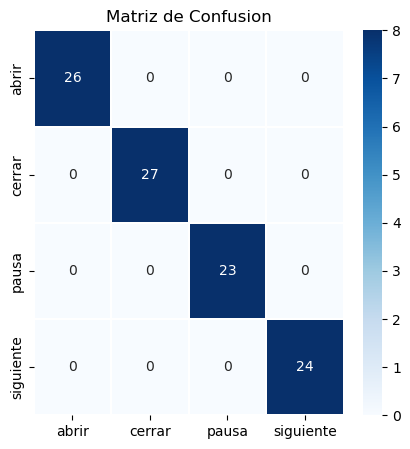

In [59]:
#matriz de confusion

etiquetas = ("abrir","cerrar","pausa","siguiente")
matriz_confusion = confusion_matrix(y_test, predicciones)
fig, ax = plt.subplots(figsize=(5, 5))

ax.set_title("Matriz de Confusion")

maping = sns.heatmap(matriz_confusion, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=etiquetas,
                     yticklabels=etiquetas, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [60]:
with open('modelo.pkl','wb') as fw:
    pickle.dump(primer_modelo,fw) #guardar el modelo